<a href="https://colab.research.google.com/github/HitoshiSatoo/Dengue_EDA/blob/main/dengue_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np  # Arrays e cálculos numéricos
import pandas as pd  # Manipulação de tabelas e DataFrames
import matplotlib.pyplot as plt  # Gráficos básicos
import seaborn as sns  # Gráficos estatísticos aprimorados
from sklearn.model_selection import train_test_split  # Separação de dados
from sklearn.preprocessing import StandardScaler  # Normalização de dados
from sklearn.ensemble import RandomForestClassifier  # Algoritmo de ML

In [45]:
# Usar dp.read_csv
df = pd.read_csv("/content/dengue-dataset.csv")
df

,data,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
0,1998-01-01,237,179.2,25.7,20.2,28.1
1,1998-02-01,331,226.3,25.1,20.0,28.0
2,1998-03-01,562,149.1,24.8,22.4,27.2
3,1998-04-01,187,46.4,22.7,18.1,26.0
4,1998-05-01,32,88.3,19.2,15.7,22.9
...,...,...,...,...,...,...
199,2014-08-01,55,12.2,20.6,13.1,24.7
200,2014-09-01,40,69.2,23.0,18.6,26.8
201,2014-10-01,40,15.6,24.7,17.2,30.0
202,2014-11-01,57,154.8,25.0,22.1,28.3


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   data                  204 non-null    object 
 1   casos-confirmados     204 non-null    int64  
 2   chuva                 196 non-null    float64
 3   temperatura-media     204 non-null    float64
 4   temperatura-mininima  204 non-null    float64
 5   temperatura-maxima    204 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.7+ KB


In [47]:
df.describe()

,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
count,204.000000,196.000000,204.000000,204.000000,204.000000
mean,357.539216,116.650000,22.200980,17.679412,25.565196
std,1741.814759,96.631613,2.399363,3.336316,2.249864
min,0.000000,0.800000,16.400000,8.200000,19.100000
25%,6.000000,43.850000,20.100000,15.075000,23.800000
50%,17.500000,86.650000,22.700000,18.150000,26.200000
75%,84.500000,177.925000,24.225000,20.400000,27.200000
max,20428.000000,452.800000,27.200000,23.500000,30.100000


## Verificar dados faltantes e duplicados

In [48]:
# Dados faltantes
df.isnull().sum()

,0
data,0
casos-confirmados,0
chuva,8
temperatura-media,0
temperatura-mininima,0
temperatura-maxima,0


In [49]:
# Dados Duplicados
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
199,False
200,False
201,False
202,False


Como somente possuimos dados faltantes na coluna de chuvas, pode-se aplicar alguns métodos para esse problema:
* Dropna

* imputation

### Imputação dos dados

In [50]:
!pip install autoimpute

### Aplicar a média

In [51]:
df['chuva'] = df['chuva'].fillna(df['chuva'].mean())

## Mudar os dados data para to_time e separar por estação do ano

In [52]:
# Converter a coluna para datetime
df['data'] = pd.to_datetime(df['data'])

In [53]:
# Função para mapear as estações do ano (Hemisfério Sul)
def get_season(date):
    month = date.month
    day = date.day

    if (month == 12 and day >= 21) or (1 <= month <= 3 and not (month == 3 and day >= 21)):
        return 'Verão'
    elif (month == 3 and day >= 21) or (4 <= month <= 6 and not (month == 6 and day >= 21)):
        return 'Outono'
    elif (month == 6 and day >= 21) or (7 <= month <= 9 and not (month == 9 and day >= 21)):
        return 'Inverno'
    else:
        return 'Primavera'

# Aplicar a função e criar a coluna de estação
df['season'] = df['data'].apply(get_season)

# Exibir resultado
print(df)

          data  casos-confirmados  chuva  temperatura-media  \
0   1998-01-01                237  179.2               25.7   
1   1998-02-01                331  226.3               25.1   
2   1998-03-01                562  149.1               24.8   
3   1998-04-01                187   46.4               22.7   
4   1998-05-01                 32   88.3               19.2   
..         ...                ...    ...                ...   
199 2014-08-01                 55   12.2               20.6   
200 2014-09-01                 40   69.2               23.0   
201 2014-10-01                 40   15.6               24.7   
202 2014-11-01                 57  154.8               25.0   
203 2014-12-01                 37  232.8               24.9   

     temperatura-mininima  temperatura-maxima     season  
0                    20.2                28.1      Verão  
1                    20.0                28.0      Verão  
2                    22.4                27.2      Verão  
3      

## Exploração de dados (EDA)

## Normalizar os dados numéricos

In [55]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Criar cópias dos dados para comparação
df_minmax = df.copy()
df_standard = df.copy()

# Selecionar apenas colunas numéricas
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns

# Aplicar Min-Max Scaling (0 a 1)
scaler_minmax = MinMaxScaler()
df_minmax[numeric_cols] = scaler_minmax.fit_transform(df[numeric_cols])

# Aplicar Z-Score Normalization (média 0, desvio padrão 1)
scaler_standard = StandardScaler()
df_standard[numeric_cols] = scaler_standard.fit_transform(df[numeric_cols])

# Exibir os resultados
print("Dados Normalizados com Min-Max Scaling:\n", df_minmax.head())
print("\nDados Normalizados com Z-Score:\n", df_standard.head())

Dados Normalizados com Min-Max Scaling:
         data  casos-confirmados     chuva  temperatura-media  \
0 1998-01-01           0.011602  0.394690           0.861111   
1 1998-02-01           0.016203  0.498894           0.805556   
2 1998-03-01           0.027511  0.328097           0.777778   
3 1998-04-01           0.009154  0.100885           0.583333   
4 1998-05-01           0.001566  0.193584           0.259259   

   temperatura-mininima  temperatura-maxima  season  
0              0.784314            0.818182   Verão  
1              0.771242            0.809091   Verão  
2              0.928105            0.736364   Verão  
3              0.647059            0.627273  Outono  
4              0.490196            0.345455  Outono  

Dados Normalizados com Z-Score:
         data  casos-confirmados     chuva  temperatura-media  \
0 1998-01-01          -0.069373  0.662073           1.461899   
1 1998-02-01          -0.015274  1.160612           1.211218   
2 1998-03-01           0

### Histograma dos dados núméricos

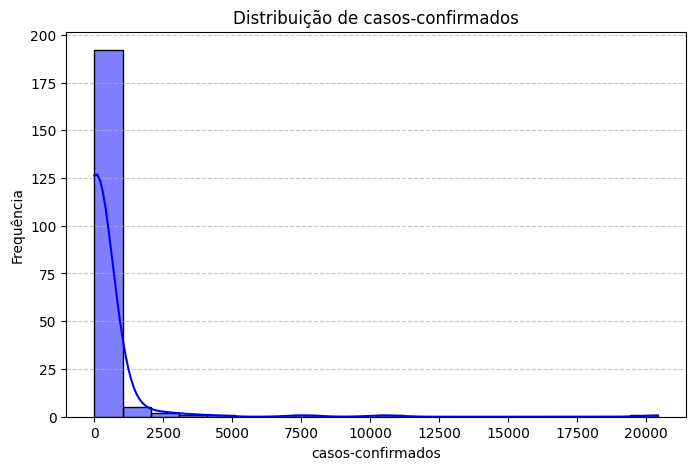

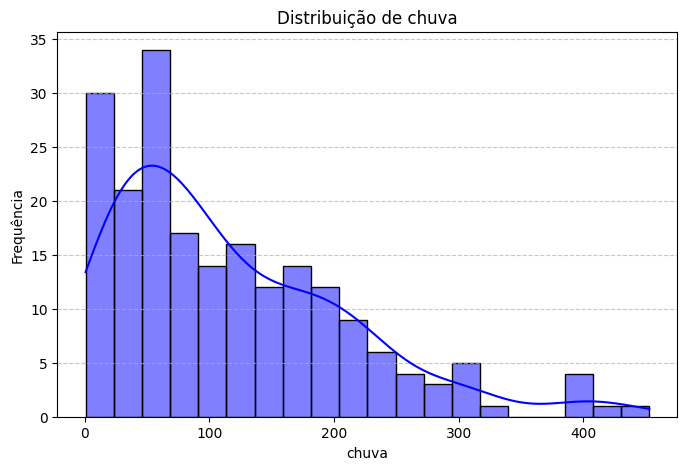

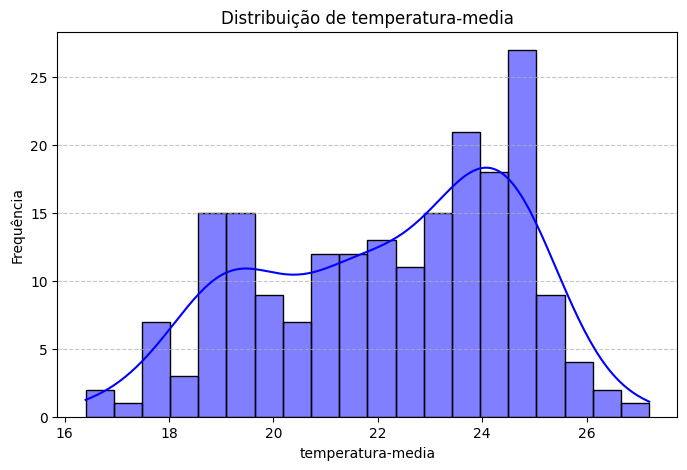

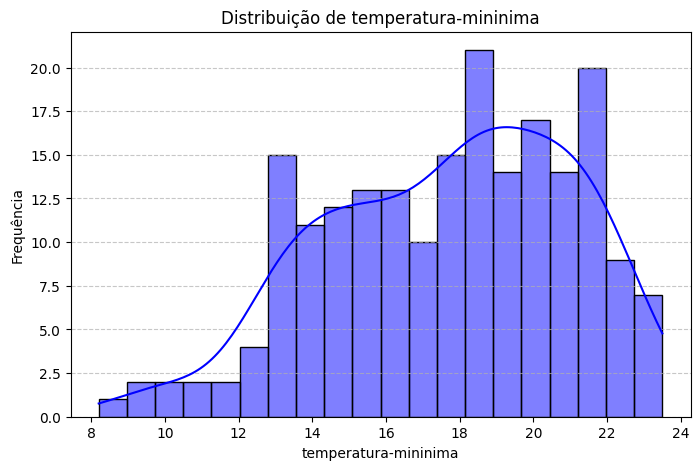

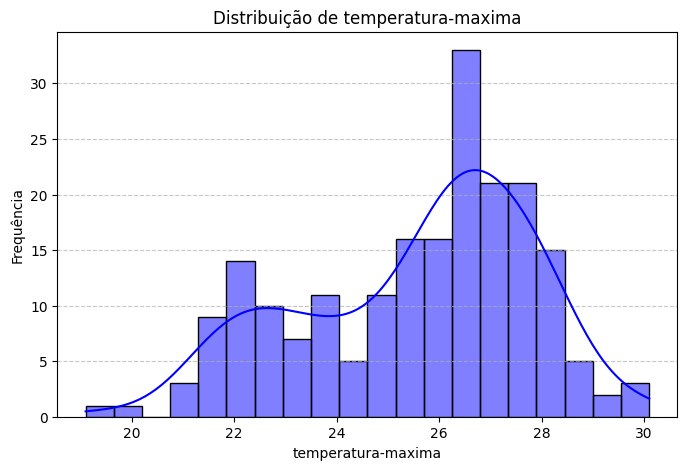

In [56]:
# Selecionar apenas colunas numéricas
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Criar histogramas separados para cada coluna numérica
for col in numerical_columns:
    plt.figure(figsize=(8, 5))  # Criar uma nova figura para cada gráfico
    sns.histplot(df[col], bins=20, kde=True, color='blue')  # Criar histograma

    # Personalizar o gráfico
    plt.title(f"Distribuição de {col}")
    plt.xlabel(col)
    plt.ylabel("Frequência")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Exibir o gráfico
    plt.show()

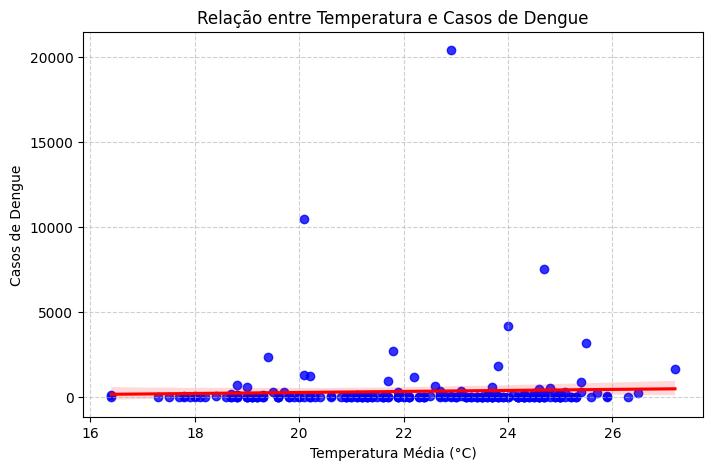

In [57]:
# Criar o gráfico de dispersão com linha de tendência
plt.figure(figsize=(8,5))
sns.regplot(data=df, x='temperatura-media', y='casos-confirmados', scatter_kws={'color':'blue'}, line_kws={'color':'red'})

# Personalizar gráfico
plt.xlabel('Temperatura Média (°C)')
plt.ylabel('Casos de Dengue')
plt.title('Relação entre Temperatura e Casos de Dengue')
plt.grid(True, linestyle='--', alpha=0.6)

# Exibir gráfico
plt.show()

## Matriz de correlação

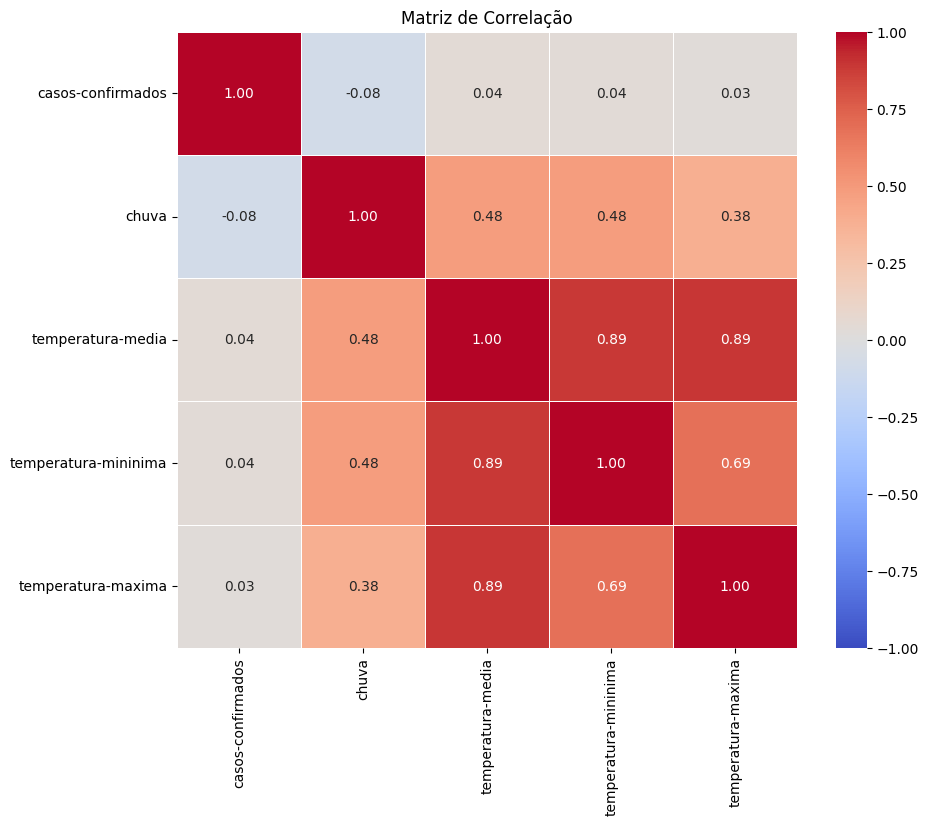

In [39]:
# Selecionar apenas as colunas numéricas
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Calcular a matriz de correlação
corr_matrix = numerical_columns.corr()

# Plotar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', vmin=-1, vmax=1)

# Personalizar o gráfico
plt.title("Matriz de Correlação")
plt.show()

Qual é a relação dos casos confirmados de dengue no Outono e Verão?

Principalmente no outono

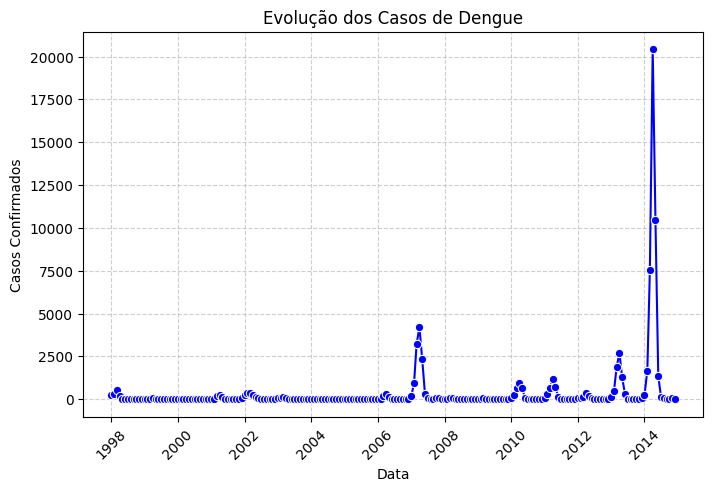

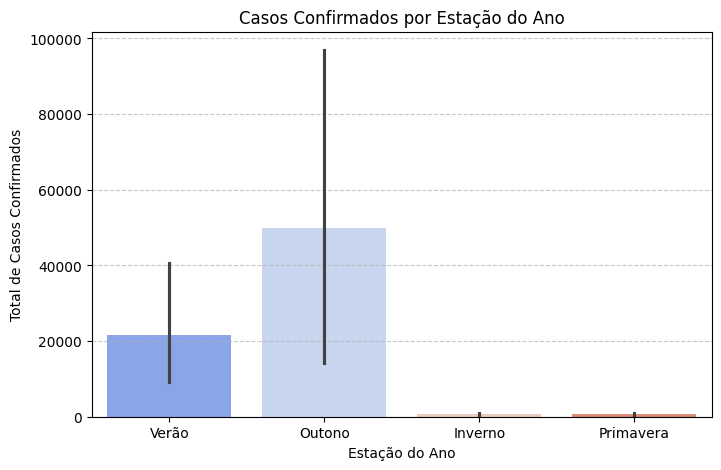

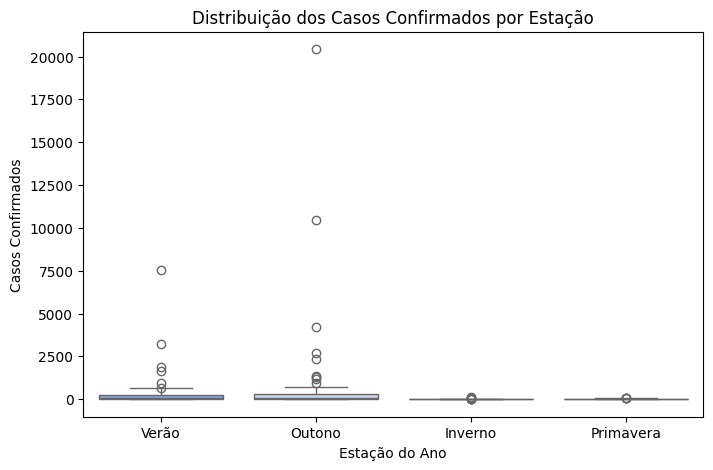

In [61]:
# Gráfico de Linha - Evolução dos casos ao longo do tempo
plt.figure(figsize=(8,5))
sns.lineplot(data=df, x='data', y='casos-confirmados', marker='o', color='b')
plt.xlabel('Data')
plt.ylabel('Casos Confirmados')
plt.title('Evolução dos Casos de Dengue')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Gráfico de Barras - Casos confirmados por estação do ano
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='season', y='casos-confirmados', hue='season', palette='coolwarm', estimator=sum)
plt.xlabel('Estação do Ano')
plt.ylabel('Total de Casos Confirmados')
plt.title('Casos Confirmados por Estação do Ano')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Boxplot - Distribuição dos casos por estação do ano
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='season', y='casos-confirmados', hue='season', palette='coolwarm')
plt.xlabel('Estação do Ano')
plt.ylabel('Casos Confirmados')
plt.title('Distribuição dos Casos Confirmados por Estação')
plt.show()

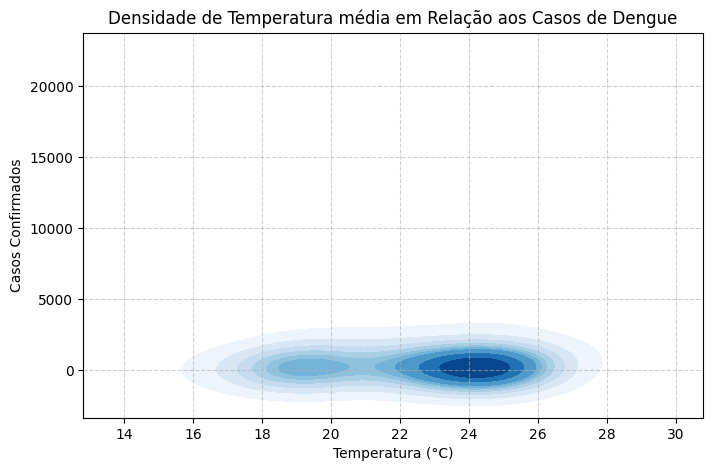

In [72]:
# Plotando o gráfico de densidade (KDE)
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='temperatura-media', y='casos-confirmados', cmap='Blues', fill=True, thresh=0.1)

# Personalizando o gráfico
plt.title('Densidade de Temperatura média em Relação aos Casos de Dengue')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Casos Confirmados')
plt.grid(True, linestyle='--', alpha=0.6)

# Exibir o gráfico
plt.show()

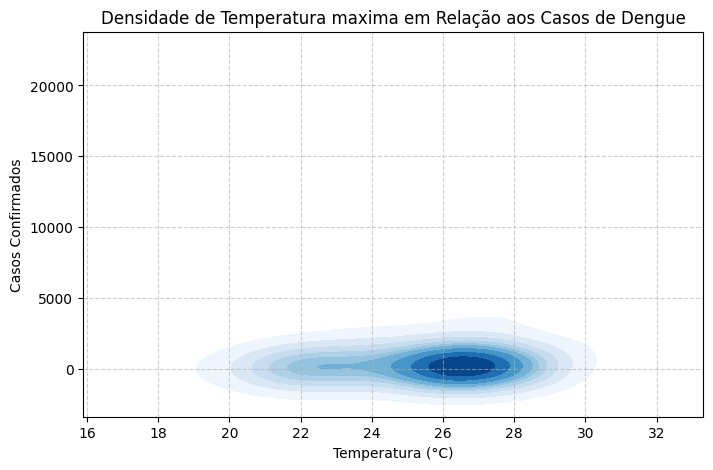

In [73]:
# Plotando o gráfico de densidade (KDE)
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='temperatura-maxima', y='casos-confirmados', cmap='Blues', fill=True, thresh=0.1)

# Personalizando o gráfico
plt.title('Densidade de Temperatura maxima em Relação aos Casos de Dengue')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Casos Confirmados')
plt.grid(True, linestyle='--', alpha=0.6)

# Exibir o gráfico
plt.show()

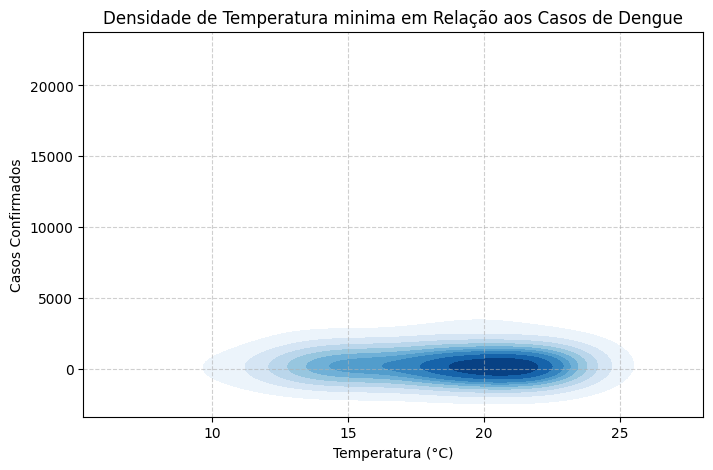

In [75]:
# Plotando o gráfico de densidade (KDE)
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='temperatura-mininima', y='casos-confirmados', cmap='Blues', fill=True, thresh=0.1)

# Personalizando o gráfico
plt.title('Densidade de Temperatura minima em Relação aos Casos de Dengue')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Casos Confirmados')
plt.grid(True, linestyle='--', alpha=0.6)

# Exibir o gráfico
plt.show()

In [63]:
# Filtrar apenas os dados de Outono e Verão
df = df[df['season'].isin(['Outono', 'Verão'])]

In [64]:
df = df.drop(columns=['data'])

In [65]:
df.describe()

,casos-confirmados,chuva,temperatura-media,temperatura-mininima,temperatura-maxima
count,102.000000,102.000000,102.000000,102.000000,102.000000
mean,700.480392,128.115196,22.414706,18.374510,25.328431
std,2420.717264,104.639896,2.582592,3.286266,2.311374
min,0.000000,0.800000,16.400000,9.800000,19.100000
25%,21.000000,47.925000,20.100000,15.625000,23.800000
50%,77.500000,96.750000,23.050000,18.800000,26.050000
75%,298.000000,184.425000,24.575000,21.300000,26.900000
max,20428.000000,452.800000,27.200000,23.500000,30.100000


## Separa os dados para treino e test